# Dependencies and Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import re
import emoji
import plotly.graph_objs as go
from plotly.offline import iplot

In [7]:
# here we save the data in the comments variable
comments = pd.read_csv("/home/monky/Descargas/ciencia_datos/Text data analysis/data/GBcomments.csv", error_bad_lines = False)
comments.head() #we can visualize the data#! pip install matplotlib #with "head" we can visualize the data

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0

In [5]:
TextBlob("It's more accurate to call it the M+ (1000) be...").sentiment.polarity#with TextBlob.sentiment.polarity we can view the polarity of the comments
comments.isna().sum()#here we can view the missing information

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [6]:
comments.dropna(inplace = True)
polarity = []
for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)#here we add the polarity in every comment 

comments["polarity"] = polarity
comments.head(20)

video_id                                       comment_text  likes  \
0   jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1   jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2   jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3   jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4   jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
5   jt2OHQh0HoQ  Keep calm and buy iphone 8 Keep calm and buy i...      0   
6   jt2OHQh0HoQ      i am a big fan of youtube and u !!!!!!!!!!!!!      0   
7   jt2OHQh0HoQ  You will never find Losers who line up and pay...      0   
8   jt2OHQh0HoQ  *APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...      0   
9   jt2OHQh0HoQ  I'm only here to see Emma, I love her so much!...      0   
10  jt2OHQh0HoQ           Mom said: Just one more video before bed      0   
11  jt2OHQh0HoQ                           what is the song?? 39:20      0   
12  jt2OHQh0HoQ  I started crying at 49:01 when Emma's EP showe...      0   
13  jt2OHQh0HoQ  3 years late on wireless charging, 3 years lat...      0   
14  jt2OHQh0HoQ                             more one before to bed      0   
15  jt2OHQh0HoQ                subscribe me if you love your mummy      0   
16  jt2OHQh0HoQ  They really just took the samsung s8 and named...      0   
17  jt2OHQh0HoQ  so if someone has a twin sibling both can unlo...      0   
18  jt2OHQh0HoQ             For god sake its better than my ps4pro      0   
19  jt2OHQh0HoQ     7mp cam what kind of standard is this in 2017?      0   

    replies  polarity  
0         0  0.450000  
1         0  0.000000  
2         0  0.000000  
3         0  0.000000  
4         0  1.000000  
5         0  0.300000  
6         0  0.000000  
7         0 -0.100000  
8         0  0.028571  
9         0  0.500000  
10        0  0.500000  
11        0  0.000000  
12        0  0.300000  
13        0  0.026563  
14        0  0.500000  
15        0  0.500000  
16        0  0.200000  
17        0  0.250000  
18        0  0.500000  
19        0  0.300000

In [5]:
comments_posivitive = comments[comments["polarity"] == 1]#here we establish the polarity posivitite in one 
comments_posivitive.shape#with shape we can see the amount of positive comments 5 in this case 
comments_posivitive.head()

video_id                                       comment_text  likes  \
4    jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26   jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80   jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158  YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175  YPVcg45W0z4                        Welcome to the Scandiworld!      0   

     replies  polarity  
4          0       1.0  
26         2       1.0  
80         1       1.0  
158        0       1.0  
175        0       1.0

## here create a set words with positive comments 

(-0.5, 999.5, 499.5, -0.5)

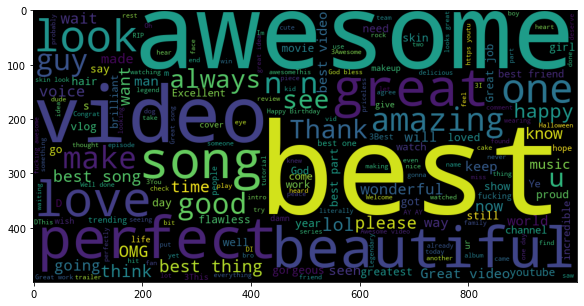

In [6]:
stopwords = set(STOPWORDS)

total_comments = "".join(comments_posivitive["comment_text"])#here we create the variable that stores the set of words

wordcloud = WordCloud(width = 1000, height = 500,stopwords = stopwords).generate(total_comments)#here we generate the image with our comments and make some visual settings

plt.figure(figsize=(15,5))#view settings
plt.imshow(wordcloud)#show picture
plt.axis("on")

## here create a set words with nagative comments 

(-0.5, 999.5, 499.5, -0.5)

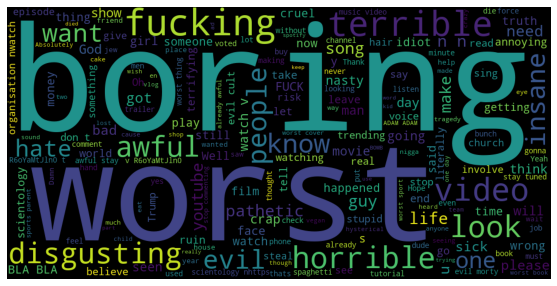

In [7]:
comments_negative = comments[comments["polarity"] == -1]

stopwords = set(STOPWORDS)

total_comments = "".join(comments_negative["comment_text"])#here we create the variable that stores the set of words

wordcloud = WordCloud(width = 1000, height = 500,stopwords = stopwords).generate(total_comments)#here we generate the image with our comments and make some visual settings

plt.figure(figsize=(15,5))#view settings
plt.imshow(wordcloud)#show picture
plt.axis("off")

# here we work with the videos and your comments

In [8]:
videos = pd.read_csv("/home/monky/Descargas/ciencia_datos/USvideos.csv", error_bad_lines = False)#here we import the data of the videos

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [9]:
videos.head()#here we can visualize the data

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

(-0.5, 999.5, 499.5, -0.5)

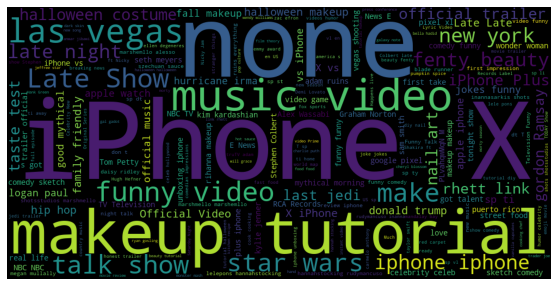

In [10]:
total_tags = "".join(videos["tags"])

tags = re.sub("[^a-zA-Z]"," ",total_tags)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 1000, height = 500,stopwords = stopwords).generate(tags)#here we generate the image with our tags and make some visual settings

plt.figure(figsize=(15,5))#view settings
plt.imshow(wordcloud)#show picture
plt.axis("off")#with this we can see (on) or not (off) the image axes

## Here we create a linear regression graphs with the likes and dislikes

Text(0.5, 1.0, 'Regressio plot sor viwes & likes')

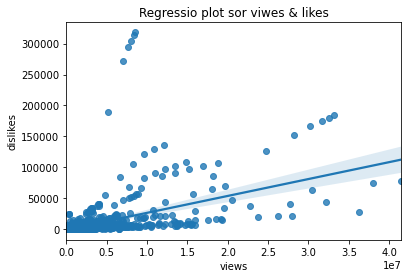

In [11]:
sns.regplot(data = videos, x = "views",y = "dislikes")#here we can create a stat based on the data we give it (in this case, "videos"), and we use specific parts of that data as axes (x = "views", y = "dislikes")
plt.title("Regressio plot sor viwes & likes")#here we give it a title

Text(0.5, 1.0, 'Regressio plot sor viwes & likes')

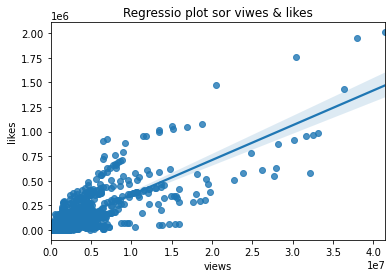

In [12]:
sns.regplot(data = videos, x = "views",y = "likes")#here we can create a stat based on the data we give it (in this case, "videos"), and we use specific parts of that data as axes (x = "views", y = "likes")
plt.title("Regressio plot sor viwes & likes")#here we give it a title

## Here we can create a heat map 

<AxesSubplot:>

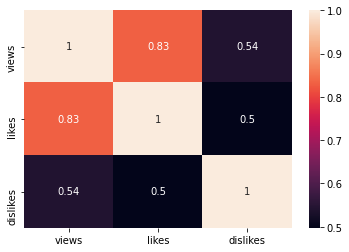

In [13]:
df_corr = videos[["views","likes","dislikes"]]# here we create the parameters for the heatmap
sns.heatmap(df_corr.corr(), annot=True)#with this we can create a heat map based on the given parameters (likes, visits, dislikes) and with annot we can more specifically indicate the heat of each zone

In [14]:
str=""

for i in comments["comment_text"]:
    list = [c for c in i if c in emoji.UNICODE_EMOJI_ENGLISH]#Here we extract the emojis in the comments of the videos
    for ele in list:
        str = str + ele#Here we agrup the all emojis in only text(str)
        
str

'😂😂😂😭😭😭😢😢😢❤❤😂👏👇👇👇👇👇👇👇👇👇👇🌞😎😣😥😫😭✌😂👎🏻👎🏻👎🏻👎🏻😂🖕😘😘▶⏭⏮◀🔥🔥😊😊🤔🤔😂😂😂😂👏🏻👏🏻❤❤😜😍😍😅❤😍😍✌😂😂😂😊😂😂😂😂😏😏😭💔😊❤❤❤❤❤😂😂😊❤😂🤣✨🌈😘😂😂❤😊😂😊😂💗😂😊😊😊💖🐢😉😍😂😂💗💗😻😻❤😂😂❤❤🤗👌🏼👌🏼😂😂😂😂💖😩🙊♥♥♥😂😂😂💙💙💙💙💙💙😂😂😂❤❤❤😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😱😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😎😎😎😎😎😎😎😍😍😍😍😍😍😘😘😘😘😘😘😘😲🖕💪🤘💓☺☺😂😂😂💕😄😄😍💕😉😩❤❤💕❤😂💕😍💗👫💖😆💕💖💕😍😍😊😄😍😀💗🦄😍😊😂😊👍😍♥❤😂👶🏻🤗☺😘💙💙💙😍😍😊😎🤘🖤👌👌😍😂👌🍍😎😎😄😄😄😄😂😂😂😬💜💜💜😭😂😍😍💖😂😂😂😂😂😂😂😭😂😭😂😭😂😂😂😍😍😍😭😍😍😂👀👀🤔😂😂😂😂😂😂😂😂😂😂🍸🍸🍸🍸🍸😂😂😂🤣🤣🤣😂😂😂😂😍💜💜💜💜😂😂😂😅😂😍💖😂😻😉🔥❤😻❤😭😭😭😭😭😭😭👍🏻😍💚💙❤❤😫❤❤❤❤❤♥😍❤😊😍😎💄🐐😅😂😂😊😊👀👌🏽❤❤❤😂💖🎉💪💪🏽😎🙌🙌😜❤❤💛💛😎🙏💚🎉🎉❤🎉🎉🎉🎉🎊🎉🎊🎉😭💗😍😍😍😍😍😍😍👏✌😁❤❤😂💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕❤😍🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😊❤❤❤❤🍔🍟😒🌿😄😄😄😉🍲🍱🎏❤💪👊🏽😘😂😂😂❤🙋☺😍😍😚💕😉😂❤❤😊☺💓🌸🙄🙄🙄🙁😞😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😉👍🏻🔥💯🚨😊☺😂😂😂🤣🙂❤❤😀😀😀♥♥😂❤😂😓😭😂❤❤😖😖😂😂😂💗💝😘💐💐💐😂😍☺😂❤😭💕🙌🏽🙌🏽🙌🏽😘😘❤❤💖😫😖📱😂😏🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😁🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😎😂😂👍🏼💯💕♥♥♥😱😱😱❤❤❤😍😍😩😩😩😩😩😩😩😍😻😻😻😻😻😳🥀♥♥♥♥♥♥😍😍😍🙃😂💕💕💕😍💕💕❤❤💕😍🍫🌹💖❤😍👸🏿👸🏿👸🏿👸🏿👸🏿💗😊😊😩❤👌🏼😻😊😍❤😂😂👏🏼❤❤❤❤❤😍😍😍💚💚💚💚💚😍😭🌹😍❤😍😍😍💚💚💚💚💚😍💚💚💚☺💙😀😍💚😕😍👌😂😂😂😍👌🏻💗❤💚💚💚😸😙😙😘💚💚💚💚😍😭😭💖💓💓💓😍❤😘😘🤗🤗🤗❤😀😀💓💓💓❤😂❤😍❤❤♥♥♥❤🙌❤😂❤❤😍❤💜😍😭😍😍😍😊💗💕😍❤💗💗💛💛💛💖💖😍😐😍😍😍😍🗿😂🤗😩😩😩💖💖💖❤❤❤❤❤😍😍✨😍👍🏻😁😂😍💅❤😘❤❤😈👀😄😈👍☝👆✊👌✌👊✋👋👏👐👉👈💔😂😂😬😭😥☺😂😂😂😂😍😍😍😜😂😂😂😂😂😒👎🏽😱😱😱😱😂😎😛🙊✊✌😑😑😑👌😊😊😍😊❤❤❤❤😍

In [15]:
# Here we create a dictionary with all the emojis and a count of their appearances
result = {}
for i in set(str):
    result[i] = str.count(i)
result

{'🈁': 5,
 '🤑': 157,
 '😲': 411,
 '👈': 148,
 '🕟': 17,
 '🐾': 87,
 '😚': 583,
 '🎬': 35,
 '🥙': 7,
 '🔖': 5,
 '⬇': 23,
 '🍙': 11,
 '🖱': 11,
 '🏋': 11,
 '🎈': 736,
 '🅾': 7,
 '🚛': 5,
 '🚦': 6,
 '⏹': 4,
 '🚕': 17,
 '📵': 6,
 '🌏': 32,
 '🏉': 16,
 '🐝': 143,
 '🌯': 74,
 '❕': 18,
 '🚔': 11,
 '🎸': 118,
 '💴': 45,
 '💎': 404,
 '🐋': 19,
 '😀': 1788,
 '💀': 892,
 '📟': 11,
 '🙉': 49,
 '🕙': 8,
 '📧': 6,
 '🐔': 43,
 '👦': 84,
 '🙎': 12,
 '👊': 376,
 '🐬': 216,
 '🥁': 17,
 '🤘': 731,
 '🍘': 10,
 '🛄': 6,
 '😈': 331,
 '🙃': 278,
 '👕': 35,
 '🏛': 15,
 '📽': 21,
 '🎂': 124,
 '🍣': 54,
 '🙍': 24,
 '👠': 66,
 '🐧': 48,
 '🏚': 6,
 '🕍': 6,
 '🐉': 23,
 '©': 23,
 '🕹': 5,
 '🖲': 5,
 '🔇': 7,
 '🥜': 1,
 '🤝': 32,
 '🎷': 48,
 '📌': 11,
 '🤖': 16,
 '🛅': 6,
 '🍻': 46,
 '↖': 5,
 '📕': 10,
 '▶': 55,
 '🍶': 17,
 '⛽': 30,
 '🏊': 12,
 '📲': 17,
 '🐀': 45,
 '⛅': 18,
 '🛠': 6,
 '⚗': 4,
 '🥨': 1,
 '🔑': 36,
 '🐼': 51,
 '◀': 8,
 '🉑': 16,
 '🍊': 26,
 '👌': 3534,
 '🚏': 6,
 '🎥': 106,
 '🖕': 1019,
 '😁': 2504,
 '🕯': 9,
 '🍾': 143,
 '🏻': 4412,
 '♑': 9,
 '🔫': 209,
 '🐨': 39,
 '🌖': 20,
 '📡': 9,

In [16]:
#and here we organize the emojis with count of appearances
final = {}
for key,value in sorted(result.items(),key = lambda item:item [1]):
    final[key] = value
final

#Here we will separate (decompress) the emojis from their dictionary keys

keys = [*final.keys()]
values = [*final.values()]

key
values

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [17]:
#here we can sisualizate the data with the library Pandas
df = pd.DataFrame({"chars":keys[-50:],"num":values[-50:]})
df

chars    num
0      💿    929
1      💋    963
2      🖕   1019
3      🤗   1128
4      😙   1139
5      😉   1153
6      🏾   1241
7      💪   1289
8      ✨   1298
9      😃   1327
10     😻   1363
11     💞   1393
12     😎   1412
13     😆   1423
14     ☺   1481
15     😄   1541
16     💓   1579
17     🤔   1734
18     😀   1788
19     💯   1796
20     🏽   1875
21     🙏   1886
22     😩   1924
23     😅   1977
24     😢   2074
25     💚   2138
26     💛   2169
27     😱   2316
28     🤣   2374
29     😁   2504
30     🙌   2734
31     🏼   2961
32     💙   2968
33     💗   3071
34     👌   3534
35     💜   3616
36     🏻   4412
37     💖   4809
38     😊   4946
39     👏   5357
40     😬   5489
41     👍   5817
42     😘   6334
43     💕   6531
44     ♥   7173
45     😭   9098
46     🔥  10249
47     😍  34856
48     ❤  36780
49     😂  43947

## In this graph we can see which emoji is most used


In [18]:
trace = go.Bar(
x=df["chars"],
y=df["num"])

iplot([trace])